#### The basic idea is analyzing the <font color=blue>Buisness Problem of Zomato </font> to get a fair idea about the factors affecting the establishment of different types of restaurant at different places in Bengaluru, aggregate rating of each restaurant and many more. I have provided the link to download the dataset at the end of this notebook.

In [20]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
import plotly.express as px
import xgboost as xgb

In [21]:
#reading the dataset
data=pd.read_csv("zomato.csv")
data.head() # prints the first 5 rows of a DataFrame

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [23]:
#first we can delete Unnnecessary Columns
data.drop(data[['url','phone']],axis=1,inplace=True)

In [24]:
#we can check also duplicated line
data.duplicated().sum()

43

In [25]:
data.drop_duplicates(inplace=True)

In [26]:
data.duplicated().sum()

0

In [27]:
# also we need to check nan values
data.isna().sum()

address                            0
name                               0
online_order                       0
book_table                         0
rate                            7767
votes                              0
location                          21
rest_type                        227
dish_liked                     28047
cuisines                          45
approx_cost(for two people)      345
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [28]:
data.dropna(how='any',inplace=True)

In [29]:
data.isna().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23395 entries, 0 to 51715
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      23395 non-null  object
 1   name                         23395 non-null  object
 2   online_order                 23395 non-null  object
 3   book_table                   23395 non-null  object
 4   rate                         23395 non-null  object
 5   votes                        23395 non-null  int64 
 6   location                     23395 non-null  object
 7   rest_type                    23395 non-null  object
 8   dish_liked                   23395 non-null  object
 9   cuisines                     23395 non-null  object
 10  approx_cost(for two people)  23395 non-null  object
 11  reviews_list                 23395 non-null  object
 12  menu_item                    23395 non-null  object
 13  listed_in(type)              23

In [31]:
data.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [32]:
#for better view lets change some of columns name 
data=data.rename(columns={'listed_in(city)':'city','listed_in(type)':'type','approx_cost(for two people)':'cost'})

In [34]:
data.tail()
#when we check cost we find that we need to remove ',' and convert to number 

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
51705,"2nd Floor, Iona, Virginia Mall, Whitefield Mai...",Izakaya Gastro Pub,Yes,Yes,3.8 /5,128,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean","1,200","[('Rated 3.0', ""RATED\n Nice place to hangout...",[],Pubs and bars,Whitefield
51707,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...",M Bar - Bengaluru Marriott Hotel Whitefield,No,No,3.9 /5,77,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,"2,000","[('Rated 4.0', 'RATED\n Went there post dinne...",[],Pubs and bars,Whitefield
51708,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",Keys Cafe - Keys Hotel,No,No,2.8 /5,161,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian","1,200","[('Rated 3.0', 'RATED\n Place is good not tha...",[],Pubs and bars,Whitefield
51711,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5 /5,81,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [36]:
data['cost']=data['cost'].astype('str')
data.cost=data.cost.apply(lambda x:x.replace(',',''))
data.cost=data.cost.astype('float')

In [38]:
data.tail()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
51705,"2nd Floor, Iona, Virginia Mall, Whitefield Mai...",Izakaya Gastro Pub,Yes,Yes,3.8 /5,128,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean",1200.0,"[('Rated 3.0', ""RATED\n Nice place to hangout...",[],Pubs and bars,Whitefield
51707,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...",M Bar - Bengaluru Marriott Hotel Whitefield,No,No,3.9 /5,77,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,2000.0,"[('Rated 4.0', 'RATED\n Went there post dinne...",[],Pubs and bars,Whitefield
51708,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",Keys Cafe - Keys Hotel,No,No,2.8 /5,161,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian",1200.0,"[('Rated 3.0', 'RATED\n Place is good not tha...",[],Pubs and bars,Whitefield
51711,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5 /5,81,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800.0,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [45]:
data.rate.unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', 'NEW', '2.4', '2.2',
       '2.3', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ',
       '2.5 ', '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1',
       '2.0', '1.8', '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ',
       '3.0 ', '2.8 ', '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ',
       '2.1 ', '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [50]:
data[data.rate=='NEW']

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
1011,"15, Bannerghatta Main Road, JP Nagar, Bangalore",Le Arabia,Yes,No,NEW,0,JP Nagar,Casual Dining,Chicken Biryani,"North Indian, Mughlai",600.0,"[('Rated 4.0', ""RATED\n Very good Arabian sty...","['Le Arabia Special Ice cream', 'Perfite Ice c...",Delivery,Bannerghatta Road
2239,"24th Main, 7th Phase, Opposite Brigade Palm Sp...",Brahma Brews,No,Yes,NEW,0,JP Nagar,"Microbrewery, Casual Dining","Beer, Cocktails, Pizza, Peri Chicken, Belgian ...","Continental, South Indian, Finger Food, Pizza,...",1400.0,"[('Rated 4.0', 'RATED\n This huge property lo...",[],Dine-out,Bannerghatta Road
2240,"57, 1st Main Rd, Sarakki Industrial Layout, 3r...",Levitate Brewery and Kitchen,No,Yes,NEW,0,JP Nagar,"Microbrewery, Casual Dining","Wheat Beer, Lager, Paneer Lollipop, Rustica Pi...","Finger Food, North Indian, Continental",1500.0,"[('Rated 4.0', 'RATED\n A new brewery has com...",[],Dine-out,Bannerghatta Road
2250,"15, Bannerghatta Main Road, JP Nagar, Bangalore",Le Arabia,Yes,No,NEW,0,JP Nagar,Casual Dining,Chicken Biryani,"North Indian, Mughlai",600.0,"[('Rated 4.0', ""RATED\n Very good Arabian sty...",[],Dine-out,Bannerghatta Road
2258,"67, Ground Floor, 3rd E Main Road, 15th Cross ...",Nourich,No,Yes,NEW,0,JP Nagar,Casual Dining,"Soba Noodles, Pad Thai Noodle, Chicken Sandwich","Continental, Chinese, North Indian, Asian, Hea...",800.0,"[('Rated 5.0', 'RATED\n The ambience is reall...",[],Dine-out,Bannerghatta Road
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50032,"74/2, Bellandur Junction, Outer Ring Road, Opp...",Parrattha Ssinghh,Yes,No,NEW,0,Bellandur,Quick Bites,Paratha,North Indian,250.0,"[('Rated 5.0', 'RATED\n Aloo paratha and pane...","['Aloo Paneer Paratha', 'Paneer Bhurji Paratha...",Dine-out,Sarjapur Road
50050,"74/2, Opposite Apollo Pharmacy, Outer Ring Roa...",Deli Chats & Sweets,Yes,No,NEW,0,Bellandur,Quick Bites,"Chaat, Tea, Sev Puri, Chai, Raj Kachori, Coffe...","Street Food, Mithai",200.0,"[('Rated 5.0', 'RATED\n Deli chaats and sweet...","['Pav Bhaji', 'Kadhi with Rice', 'Dal with Ric...",Dine-out,Sarjapur Road
50135,"Arya Hub Mall, 12/2, 13/1B, ITBP Main Road, Pr...",Potful,Yes,No,NEW,0,Whitefield,Delivery,"Hyderabadi Biryani, Rumali Roti, Raita","Biryani, Kebab, Rolls, Mughlai",650.0,"[('Rated 2.0', 'RATED\n I had ordered a coupl...","['Calcutta Chicken Roll', 'Galouti Kebab With ...",Delivery,Whitefield
50571,"176, Thubarahalli, Near Kundalahalli Gate, Whi...",Temptation,Yes,No,NEW,0,Whitefield,Quick Bites,Mutton Curry,North Indian,500.0,"[('Rated 5.0', 'RATED\n Just to say Ã\x83Ã\...",[],Delivery,Whitefield


In [53]:
df = data.loc[data.rate !='NEW']
remove = lambda x: x.replace('/5', '') if type(x) == np.str else x
data.rate = df.rate.apply(remove).str.strip().astype('float')
data['rate'].head() # looking at the dataset after transformation

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [56]:
# we can also replace yes and no with 0 and 1 
data.online_order=data.online_order.map({'Yes':1,'No':0})

In [57]:
data.book_table=data.book_table.map({'Yes':1,'No':0})

In [58]:
data.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [64]:
data.cost.unique()
#look normal

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [66]:
data.type.unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [77]:
data.drop(['menu_item'],axis=1,inplace=True)

In [78]:
data.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [80]:
data.name.unique()

array(['Jalsa', 'Spice Elephant', 'San Churro Cafe', ..., 'Tuk-Tuk',
       'Chime - Sheraton Grand Bengaluru Whitefield Hotel &...',
       'Fujian Express'], dtype=object)

In [81]:
# we can remove name as well
data.drop('name',axis=1,inplace=True)

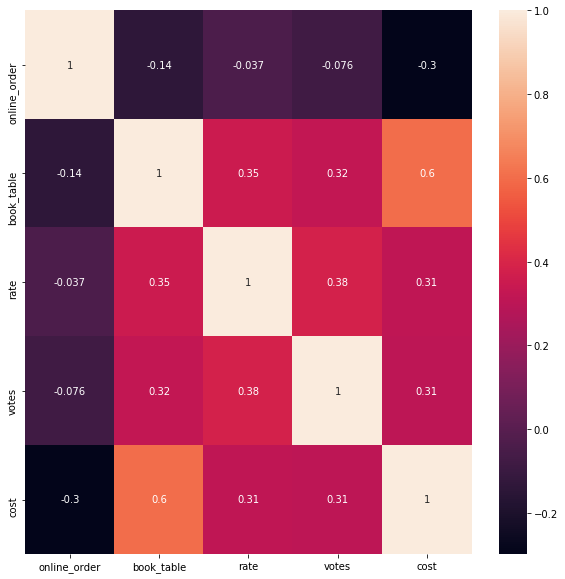

In [97]:
# let's do some visualization 
fig = plt.gcf()
fig.set_size_inches(10,10)
sns.heatmap(data.corr(),annot=True)

Text(0.5, 1.0, 'Restaurant offer online')

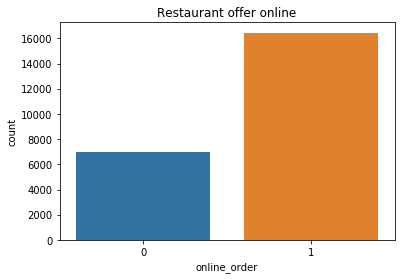

In [99]:
sns.countplot(data.online_order)
plt.title('Restaurant offer online')

[Text(0, 0, 'Banashankari'),
 Text(0, 0, 'Bannerghatta Road'),
 Text(0, 0, 'Basavanagudi'),
 Text(0, 0, 'Bellandur'),
 Text(0, 0, 'Brigade Road'),
 Text(0, 0, 'Brookefield'),
 Text(0, 0, 'BTM'),
 Text(0, 0, 'Church Street'),
 Text(0, 0, 'Electronic City'),
 Text(0, 0, 'Frazer Town'),
 Text(0, 0, 'HSR'),
 Text(0, 0, 'Indiranagar'),
 Text(0, 0, 'Jayanagar'),
 Text(0, 0, 'JP Nagar'),
 Text(0, 0, 'Kalyan Nagar'),
 Text(0, 0, 'Kammanahalli'),
 Text(0, 0, 'Koramangala 4th Block'),
 Text(0, 0, 'Koramangala 5th Block'),
 Text(0, 0, 'Koramangala 6th Block'),
 Text(0, 0, 'Koramangala 7th Block'),
 Text(0, 0, 'Lavelle Road'),
 Text(0, 0, 'Malleshwaram'),
 Text(0, 0, 'Marathahalli'),
 Text(0, 0, 'MG Road'),
 Text(0, 0, 'New BEL Road'),
 Text(0, 0, 'Old Airport Road'),
 Text(0, 0, 'Rajajinagar'),
 Text(0, 0, 'Residency Road'),
 Text(0, 0, 'Sarjapur Road'),
 Text(0, 0, 'Whitefield')]

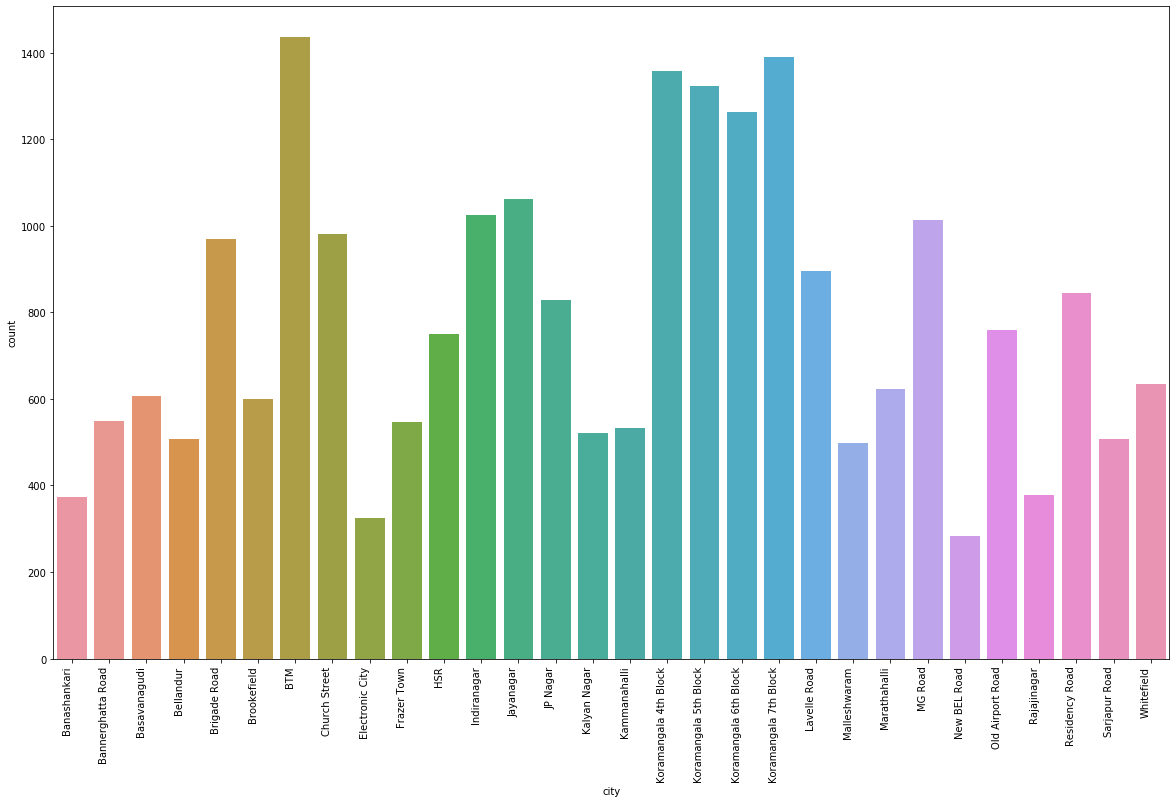

In [100]:
plt.figure(figsize=(20,12))
sns.countplot(data['city']).set_xticklabels(sns.countplot(data['city']).get_xticklabels(), rotation=90, ha="right")

[Text(0, 0, '1.8'),
 Text(0, 0, '2.0'),
 Text(0, 0, '2.1'),
 Text(0, 0, '2.2'),
 Text(0, 0, '2.3'),
 Text(0, 0, '2.4'),
 Text(0, 0, '2.5'),
 Text(0, 0, '2.6'),
 Text(0, 0, '2.7'),
 Text(0, 0, '2.8'),
 Text(0, 0, '2.9'),
 Text(0, 0, '3.0'),
 Text(0, 0, '3.1'),
 Text(0, 0, '3.2'),
 Text(0, 0, '3.3'),
 Text(0, 0, '3.4'),
 Text(0, 0, '3.5'),
 Text(0, 0, '3.6'),
 Text(0, 0, '3.7'),
 Text(0, 0, '3.8'),
 Text(0, 0, '3.9'),
 Text(0, 0, '4.0'),
 Text(0, 0, '4.1'),
 Text(0, 0, '4.2'),
 Text(0, 0, '4.3'),
 Text(0, 0, '4.4'),
 Text(0, 0, '4.5'),
 Text(0, 0, '4.6'),
 Text(0, 0, '4.7'),
 Text(0, 0, '4.8'),
 Text(0, 0, '4.9')]

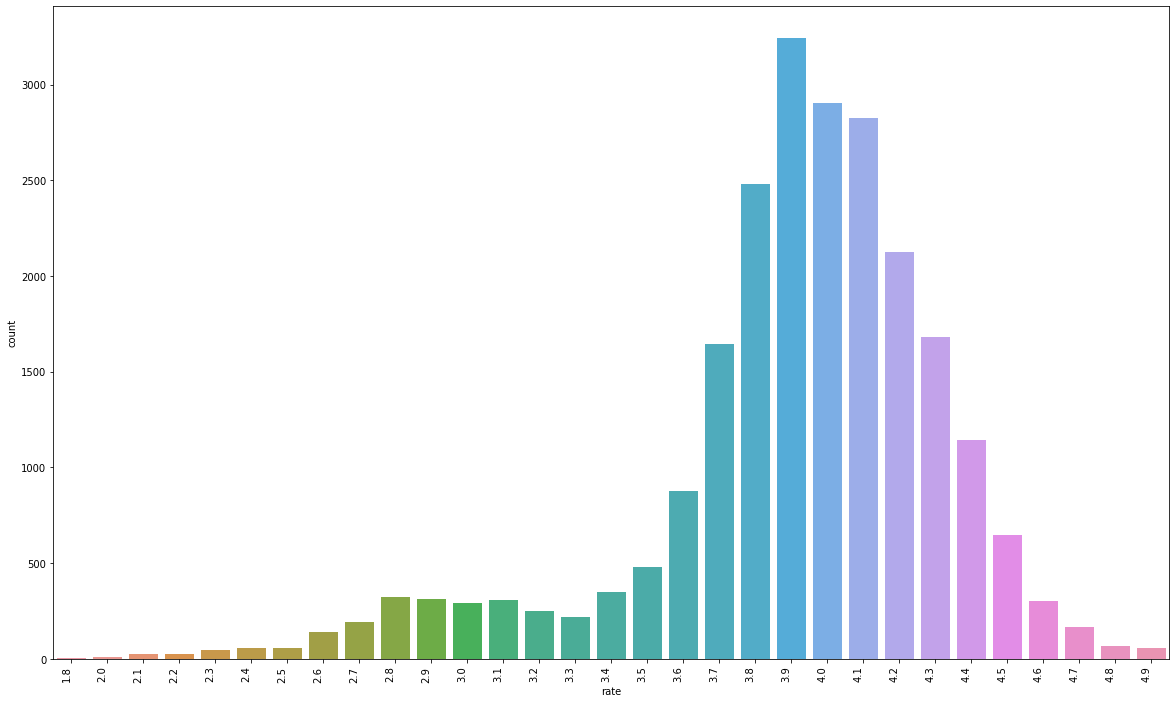

In [95]:
plt.figure(figsize=(20,12))
sns.countplot(data['rate']).set_xticklabels(sns.countplot(data['rate']).get_xticklabels(), rotation=90, ha="right")

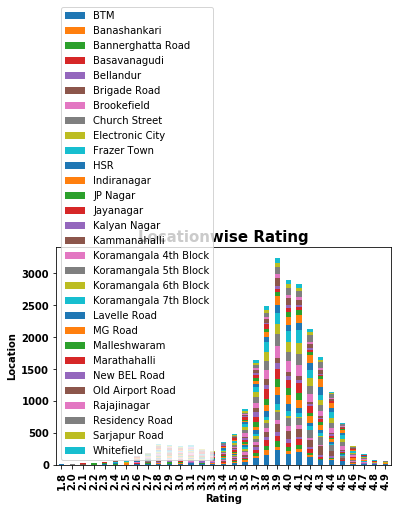

In [110]:
fig.set_size_inches(49,43)
loc_plt=pd.crosstab(data['rate'],data['city'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Locationwise Rating',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend();
#plt.figure(figsize=(40,32))


In [113]:
px.box(data.cost)
#we will not consider this outliers because maybe that restaurant expensive 

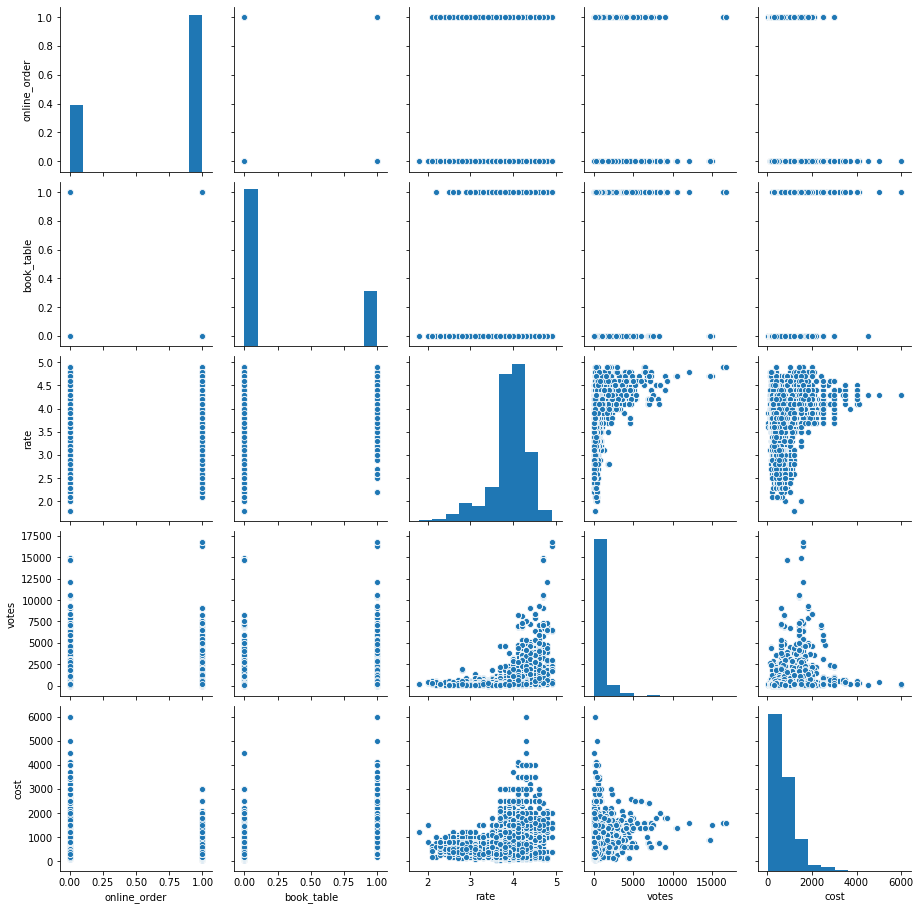

In [114]:
sns.pairplot(data)

Text(0.5, 1.0, 'Type of Service')

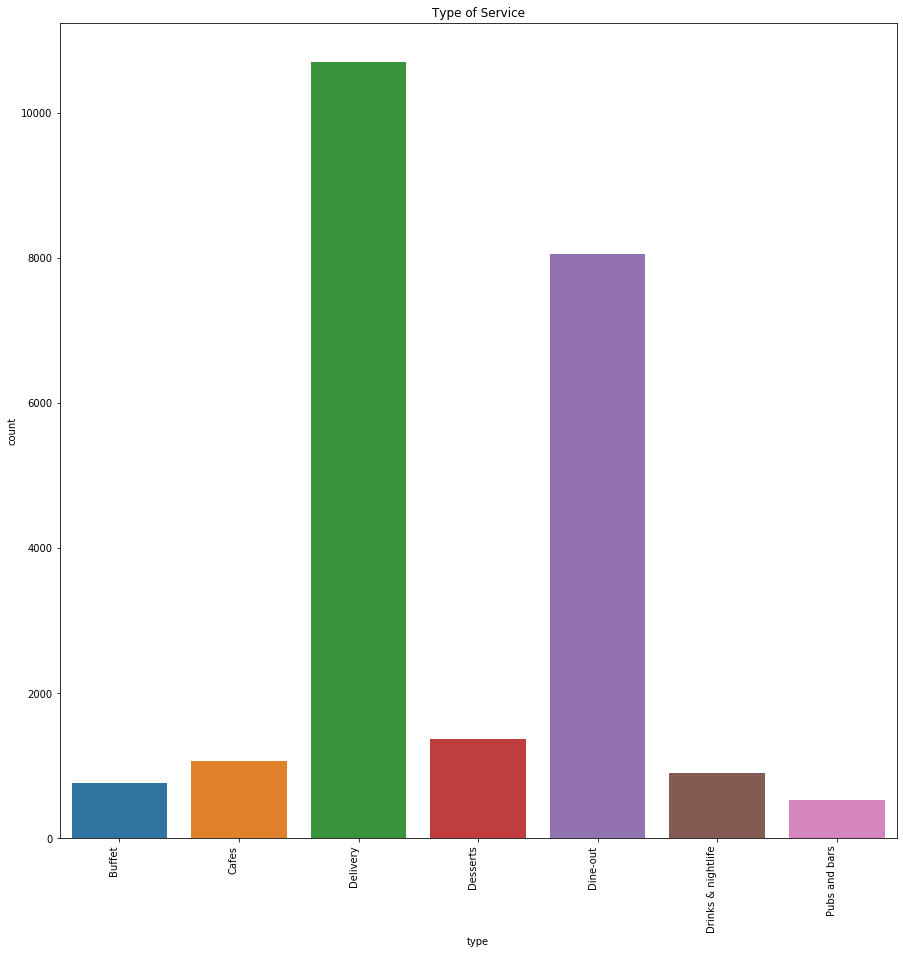

In [116]:
sns.countplot(data['type'])
sns.countplot(data['type']).set_xticklabels(sns.countplot(data['type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Type of Service')

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 <a list of 8 Text yticklabel objects>)

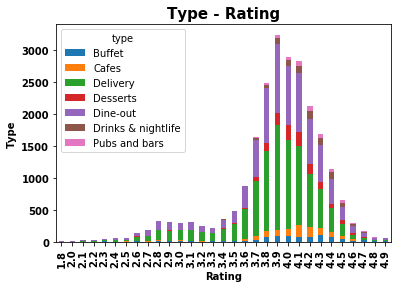

In [118]:
type_plt=pd.crosstab(data['rate'],data['type'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')

Text(0.5, 0, 'Number of outlets')

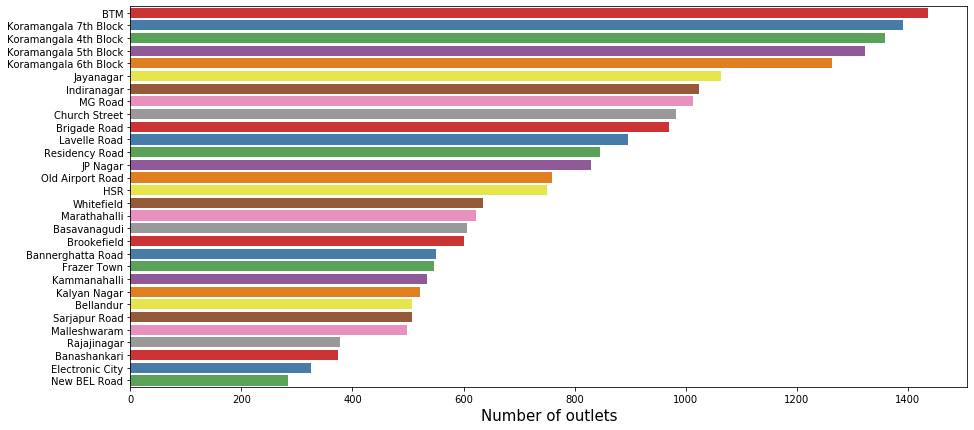

In [122]:
plt.figure(figsize=(15,7))
city=data['city'].value_counts()
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.xlabel("Number of outlets",size=15)

In [136]:
data_new=data
con=pd.get_dummies(data_new.type)
data_new=pd.concat((data_new,con),axis=1)
con2=pd.get_dummies(data_new.city)
data_new=pd.concat((data_new,con2),axis=1)
data_new.head()

,address,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,...,Lavelle Road,MG Road,Malleshwaram,Marathahalli,New BEL Road,Old Airport Road,Rajajinagar,Residency Road,Sarjapur Road,Whitefield
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,...,0,0,0,0,0,0,0,0,0,0
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,...,0,0,0,0,0,0,0,0,0,0
2,"1112, Next to KIMS Medical College, 17th Cross...",1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,...,0,0,0,0,0,0,0,0,0,0
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,...,0,0,0,0,0,0,0,0,0,0
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",0,0,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23395 entries, 0 to 51715
Data columns (total 50 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   address                23395 non-null  object 
 1   online_order           23395 non-null  int64  
 2   book_table             23395 non-null  int64  
 3   rate                   23248 non-null  float64
 4   votes                  23395 non-null  int64  
 5   location               23395 non-null  object 
 6   rest_type              23395 non-null  object 
 7   dish_liked             23395 non-null  object 
 8   cuisines               23395 non-null  object 
 9   cost                   23395 non-null  float64
 10  reviews_list           23395 non-null  object 
 11  type                   23395 non-null  object 
 12  city                   23395 non-null  object 
 13  Buffet                 23395 non-null  uint8  
 14  Cafes                  23395 non-null  uint8  
 15  De

In [140]:
#remove unnecessary columns 
data_new.drop(data_new[['cuisines','dish_liked','address','rest_type','city','type','reviews_list','location']],axis=1,inplace=True)

In [142]:
data_new.head()
df=data_new
df.drop('rate',axis=1,inplace=True)

In [205]:
x = df
y = data['rate']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=100)
x_train.head()

,online_order,book_table,votes,cost,Buffet,Cafes,Delivery,Desserts,Dine-out,Drinks & nightlife,...,Lavelle Road,MG Road,Malleshwaram,Marathahalli,New BEL Road,Old Airport Road,Rajajinagar,Residency Road,Sarjapur Road,Whitefield
32878,1,0,334,400.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12755,1,0,87,500.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
28935,1,1,1542,800.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
33330,0,0,1225,800.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26334,1,0,153,500.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [148]:
y_train.fillna(y_train.mode()[0])
y_test.fillna(y_test.mode()[0])

,online_order,book_table,votes,cost,Buffet,Cafes,Delivery,Desserts,Dine-out,Drinks & nightlife,...,Lavelle Road,MG Road,Malleshwaram,Marathahalli,New BEL Road,Old Airport Road,Rajajinagar,Residency Road,Sarjapur Road,Whitefield
21063,1,0,620,750.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
32791,1,0,149,350.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2951,0,0,217,450.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41498,0,1,72,400.0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
19422,1,0,233,400.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [206]:
#Prepare a Linear Regression Model
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [207]:
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.2569254953647949

In [208]:
#Prepairng a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.46435109423580134

In [209]:
#Preparing Random Forest REgression
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.6267719926997668

In [210]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ETree=ExtraTreesRegressor(n_estimators = 100)
ETree.fit(x_train,y_train)
y_predict=ETree.predict(x_test)


from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.47376546064559233

In [214]:
#still the accuracy not good
#Encode the input Variables
def Encode(data):
    for column in data.columns[~data.columns.isin(['rate', 'cost', 'votes'])]:
        data[column] = data[column].factorize()[0]
    return data

data_en = Encode(data.copy())
data_en.head() # looking at the dataset after transformation

,address,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,type,city
0,0,0,0,4.1,775,0,0,0,0,800.0,0,0,0
1,1,0,1,4.1,787,0,0,1,1,800.0,1,0,0
2,2,0,1,3.8,918,0,1,2,2,800.0,2,0,0
3,3,1,1,3.7,88,0,2,3,3,300.0,3,0,0
4,4,1,1,3.8,166,1,0,4,4,600.0,4,0,0


In [215]:
#Defining the independent variables and dependent variables
x = data_en.iloc[:,[2,3,5,6,7,8,9,11]]
y = data_en['rate']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()

,book_table,rate,location,rest_type,dish_liked,cuisines,cost,type
21063,1,4.1,2,0,37,35,750.0,4
32791,1,4.4,13,11,3353,348,350.0,2
2951,1,3.7,1,0,108,95,450.0,2
41498,0,4.3,48,24,4499,782,400.0,3
19422,1,4.6,2,4,3322,61,400.0,1


In [216]:
#Prepairng a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

1.0

In [217]:
#Preparing Random Forest REgression
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9999994774550818

In [219]:
data.dish_liked[0]

'Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup'

(23395,)

(23395, 41)